<a href="https://colab.research.google.com/github/rrben/Regressao/blob/main/aprovacao_alunos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [42]:
#Importe o arquivo formato xlsx
aprova = pd.read_excel("/content/aprovacao_alunos.xlsx")
aprova.head()

,ano_2015,ano_2016
0,77,85
1,79,81
2,83,85
3,81,82
4,73,76


In [43]:
aprova.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


In [44]:
aprova.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [45]:
aprova.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ano_2015  27 non-null     int64
 1   ano_2016  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


<Axes: xlabel='ano_2015', ylabel='Count'>

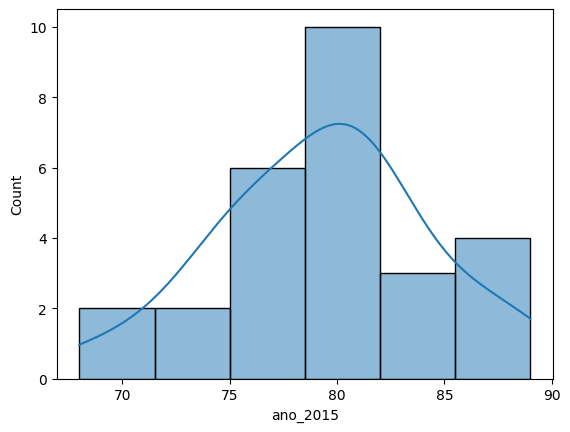

In [50]:
sns.histplot(data=aprova, x="ano_2015", kde=True)

<Axes: xlabel='ano_2016', ylabel='Count'>

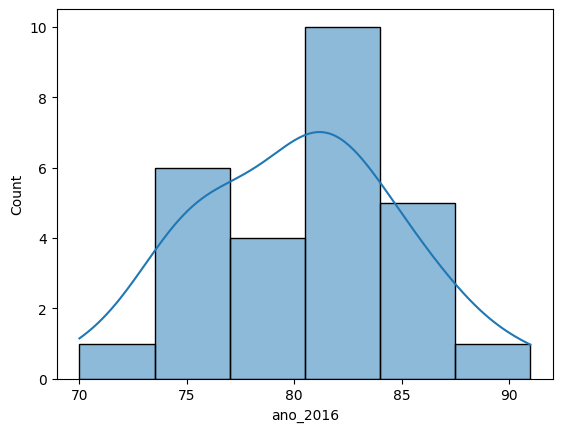

In [51]:
sns.histplot(data=aprova, x="ano_2016", kde=True)

<Axes: xlabel='ano_2015', ylabel='ano_2016'>

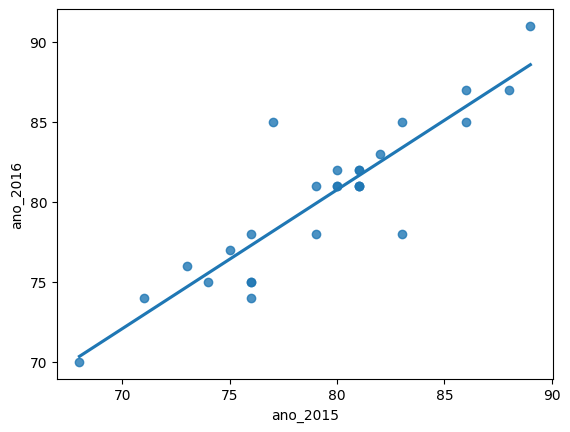

In [52]:
sns.regplot(x = "ano_2015", y = "ano_2016", ci = None, data = aprova) 

In [53]:
aprova.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


aprova_norm = pd.DataFrame(scaler.fit_transform(aprova), index=aprova.index, columns=aprova.columns)

In [55]:
aprova_norm.head()

,ano_2015,ano_2016
0,0.428571,0.714286
1,0.523810,0.523810
2,0.714286,0.714286
3,0.619048,0.571429
4,0.238095,0.285714


In [56]:
aprova_norm.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,0.539683,0.485009
std,0.236626,0.229530
min,0.000000,0.000000
25%,0.380952,0.309524
50%,0.571429,0.523810
75%,0.642857,0.595238
max,1.000000,1.000000


<Axes: xlabel='ano_2015', ylabel='Count'>

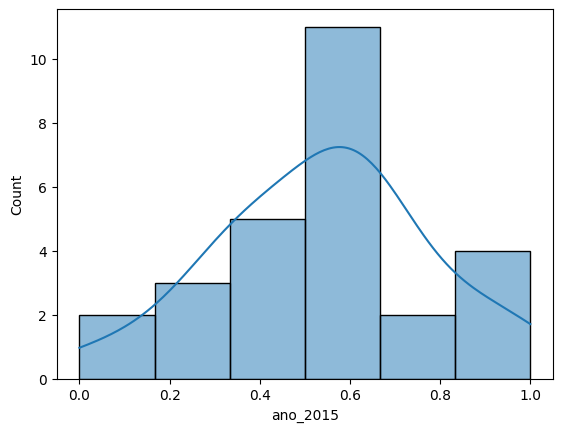

In [57]:
sns.histplot(data=aprova_norm, x="ano_2015", kde=True)

<Axes: xlabel='ano_2016', ylabel='Count'>

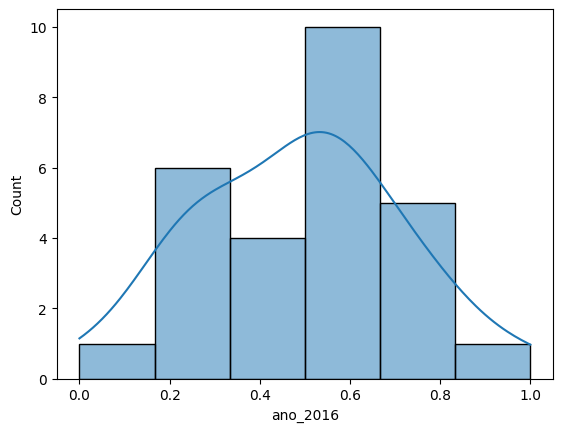

In [58]:
sns.histplot(data=aprova_norm, x="ano_2016", kde=True)

<Axes: xlabel='ano_2015', ylabel='ano_2016'>

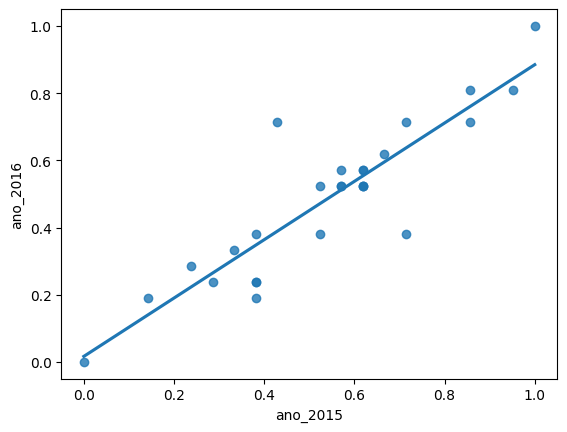

In [59]:
sns.regplot(x = "ano_2015", y = "ano_2016", ci = None, data = aprova_norm) 

In [60]:
import statsmodels.formula.api as smf

In [61]:
function = 'ano_2015~ano_2016'
model =smf.ols(formula=function, data=aprova_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2015   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Sat, 06 May 2023   Prob (F-statistic):           3.02e-10
Time:                        01:57:14   Log-Likelihood:                 22.904
No. Observations:                  27   AIC:                            -41.81
Df Residuals:                      25   BIC:                            -39.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0922      0.049      1.874      0.0

In [62]:
x = aprova_norm[["ano_2015"]]

y = aprova_norm[["ano_2016"]]

In [67]:
#Separando os dados de Treino e Teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)

#Criando um Objeto de Regressão Linear
lr = LinearRegression()

#Treinando o Modelo
lr.fit(x_treino,y_treino)

LinearRegression()

In [68]:
r_sq = lr.score(x, y)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 0.7956006593039586


In [69]:
y_pred_treino = lr.predict(x_treino)
print('MAE:', metrics.mean_absolute_error(y_treino, y_pred_treino))
print('MSE:', metrics.mean_squared_error(y_treino, y_pred_treino))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino)))

MAE: 0.06313092719197842
MSE: 0.006947385853516443
RMSE: 0.08335097991935334


MAE (Erro Absoluto Médio) = é a média do valor absoluto dos erros;

MSE (Erro Quadrático Médio) = é a média dos erros quadráticos;

RMSE (Erro Médio Quadrático da Raiz) = é a raiz quadrática da média dos erros quadráticos.

In [70]:
y_pred = lr.predict(x_teste)
print('MAE:', metrics.mean_absolute_error(y_teste, y_pred))
print('MSE:', metrics.mean_squared_error(y_teste, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred)))

MAE: 0.10156392395533688
MSE: 0.02234792217796548
RMSE: 0.14949221443929941
